In [14]:
# Import
import numpy as np
from matplotlib import pyplot as plt
# import os

# os.chdir(r'./')

In [15]:
def read_stress_strain(filename):
    '''Read stress-strain data from output files'''
    data = np.genfromtxt(filename, delimiter=None, comments="#")
    eps = data[1:,0]    # strain vector(,1)
    sig = data[1:,1:]   # stress tensor(,6)
    return eps, sig

In [16]:
def calc_tensor():
    '''Calculate elastic tensor from stress-strain data'''
    C=np.zeros((6,6))
    for i in range(6):
        eps, sig = read_stress_strain(f'stress_strain/stress_strain.neg{i+1}.out')
        ncc = np.array([np.cov(eps,sig[:,j],ddof=0)[0,-1]/np.var(eps) for j in range(6)])
        eps, sig = read_stress_strain(f'stress_strain/stress_strain.pos{i+1}.out')
        pcc = np.array([np.cov(eps,sig[:,j],ddof=0)[0,-1]/np.var(eps) for j in range(6)])
        C[i,:] = 0.5*(ncc+pcc)

    return C

In [18]:
C=calc_tensor()
C

array([[114.8451205 ,  38.99329673,  40.7958453 , -12.63768242,
         -4.19957257,  -8.96747064],
       [ 38.30833666, 105.57948321,  36.52112678,   0.73866607,
          5.70947983,   8.25666169],
       [ 33.76316152,  30.31933001,  91.75658343,  -9.65592885,
         -9.1012643 ,  -5.85657458],
       [ -1.50456536,  -2.65413827,  -1.23648192,  23.35504306,
          2.95383172,  -0.18168846],
       [ -4.16092369,   2.98446021,  -0.52449375,  -4.61650611,
          7.35006036,  -2.08506662],
       [ -4.88859978,   1.49467188,  -2.31026969,   0.35187172,
         -7.16845926,  23.47668051]])

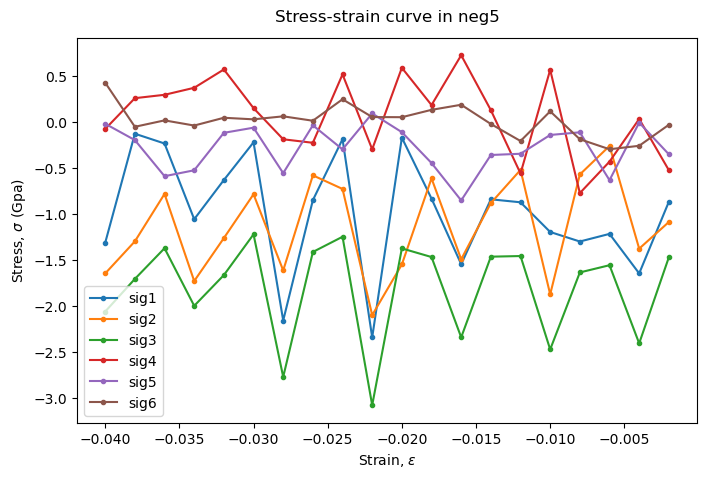

In [22]:
direction = 'neg5'
filename = f'stress_strain/stress_strain.{direction}.out'
eps, sig = read_stress_strain(filename)
# Set draw
# from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
# plt.rcParams["figure.dpi"] = 300
ax = plt.subplot(111)
plt.plot(eps, sig, linewidth=1.5,marker='o',markersize=3)
plt.xlabel(r'Strain, $\epsilon$')
plt.ylabel(r'Stress, $\sigma$ (Gpa)')
plt.title(f'Stress-strain curve in {direction}',x=0.5,y=1.02)
plt.legend(labels=['sig1', 'sig2', 'sig3', 'sig4', 'sig5', 'sig6'])


In [18]:
1150/30*5.3


203.16666666666669